In [103]:
#!/usr/bin/python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
from timeit import default_timer as timer

from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA,FactorAnalysis
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score
from cluster_func import kmeans
from cluster_func import em
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from scipy.stats import kurtosis, skew


In [104]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,cross_val_score, ShuffleSplit, GridSearchCV, learning_curve

In [105]:
#data = pd.read_csv('winequality-white.csv',';')

In [106]:
data = pd.read_csv('cardiovascular.csv',';')

D:\python\anaconda\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [118]:
X = data.drop(['id','cardio'], axis=1)
Y1= data.cardio 
features = list(X.columns.values)
scaler = preprocessing.MinMaxScaler()

X1 = scaler.fit_transform(X)

In [136]:
# Splitting data into training sets and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.2)

0.5004545454545455
0.2586363636363636
0.36272727272727273
0.33454545454545453
0.24181818181818182
0.2681818181818182
0.18045454545454545
0.1831818181818182


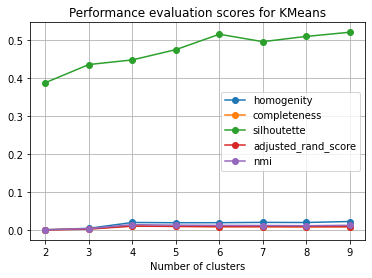

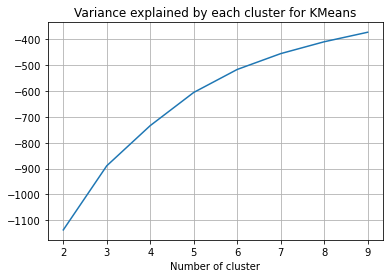

In [137]:
array_homo =[]
array_comp = []
array_sil = []
array_var = []
array_accuracy=[]
array_adj=[]
array_nmi=[]
cost =[]

component_list = range(2, 10,1)
for num_classes in component_list:

    clf = KMeans(n_clusters= num_classes, init='k-means++',n_init=50, max_iter=300, random_state=20)
    
    clf.fit(X_train)
    y_test_pred = clf.predict(X_test)
    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_test, y_test_pred)
    array_homo.append(homo)
    
    #Completeness score
    comp = metrics.completeness_score(y_test, y_test_pred)
    array_comp.append(comp)
    
    acc_score=metrics.accuracy_score(y_test, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)
    nmi_score=normalized_mutual_info_score(y_test, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_test, y_test_pred)
    array_adj.append(adj_score)
    
    #Silhoutette score
    sil = metrics.silhouette_score(X_test, y_test_pred, metric='euclidean')
    array_sil.append(sil)

    #Variance explained by the cluster
    var = clf.score(X_test)
    array_var.append(var)
    
    cost.append(clf.inertia_) 
    
    

#Generating plots
fig4,ax4 = plt.subplots()
ax4.plot(component_list, array_homo,"-o")
ax4.plot(component_list, array_comp,"-o")
ax4.plot(component_list, array_sil,"-o")
ax4.plot(component_list, array_adj,"-o")
ax4.plot(component_list, array_nmi,"-o")
#ax4.plot(component_list, array_accuracy,"-o")
plt.grid(True)
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for KMeans')
plt.grid(True)

fig5, ax5 = plt.subplots()
ax5.plot(component_list, array_var)
plt.title('Variance explained by each cluster for KMeans')
plt.xlabel('Number of cluster')
plt.grid(True)
plt.show()



In [121]:
kmeans = KMeans(n_clusters= 6, init='k-means++',n_init=50, max_iter=300, random_state=20)
start = timer()
X_kmeans=kmeans.fit_transform(X_train)
end = timer()
print("Time for fit: ", end - start)

Time for fit:  0.5054897000081837


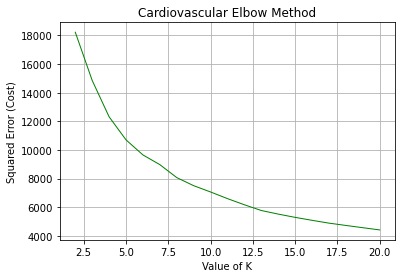

In [279]:
plt.plot(range(2, 21), cost, color ='g', linewidth ='1')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.grid(True)
plt.title("Cardiovascular Elbow Method")
plt.show()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.2)

0.5027272727272727
0.19590909090909092
0.3327272727272727
0.22181818181818183
0.14727272727272728
0.23363636363636364
0.23363636363636364
0.16318181818181818


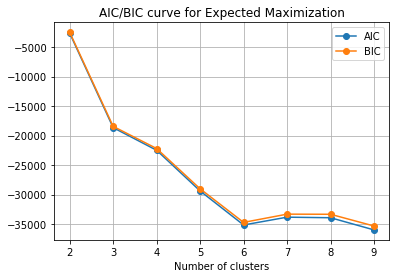

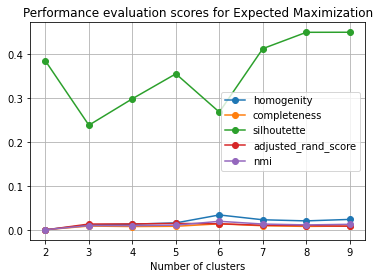

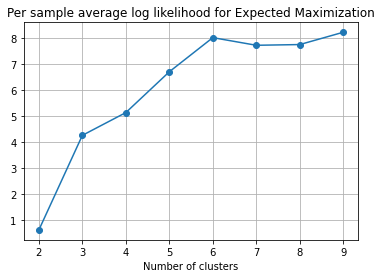

In [139]:
array_aic = []
array_bic = []
array_homo =[]
array_comp = []
array_sil = []
array_avg_log = []
array_accuracy=[]
array_adj=[]
array_nmi=[]

component_list = range(2, 10,1)
for num_classes in component_list:

    clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', max_iter=300, init_params= 'kmeans')
    #clf = KMeans(n_clusters= num_classes, init='k-means++')
    clf.fit(X_train)

    y_test_pred = clf.predict(X_test)
    #Per sample average log likelihood
    avg_log = clf.score(X_test)
    array_avg_log.append(avg_log)

    #AIC on the test data
    aic = clf.aic(X_test)
    array_aic.append(aic)

    #BIC on the test data
    bic = clf.bic(X_test)
    array_bic.append(bic)
    
    acc_score=metrics.accuracy_score(y_test, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)

    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_test, y_test_pred)
    array_homo.append(homo)

    #Completeness score
    comp = metrics.completeness_score(y_test, y_test_pred)
    array_comp.append(comp)
    
    #print(acc_score)
    nmi_score=normalized_mutual_info_score(y_test, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_test, y_test_pred)
    array_adj.append(adj_score)

    #Silhoutette score
    sil = metrics.silhouette_score(X_test, y_test_pred, metric='euclidean')
    array_sil.append(sil)

#Generating plots

fig1,ax1 = plt.subplots()
ax1.plot(component_list, array_aic,"-o")
ax1.plot(component_list, array_bic,"-o")
plt.legend(['AIC', 'BIC'])
plt.xlabel('Number of clusters')
plt.title('AIC/BIC curve for Expected Maximization')
plt.grid(True)
fig2,ax2 = plt.subplots()
ax2.plot(component_list, array_homo,"-o")
ax2.plot(component_list, array_comp,"-o")
ax2.plot(component_list, array_sil,"-o")
ax2.plot(component_list, array_adj,"-o")
ax2.plot(component_list, array_nmi,"-o")
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for Expected Maximization')
plt.grid(True)

fig3, ax3 = plt.subplots()
ax3.plot(component_list, array_avg_log,"-o")
plt.xlabel('Number of clusters')
plt.title('Per sample average log likelihood for Expected Maximization')
plt.grid(True)

plt.show()

In [140]:
em = GaussianMixture(n_components=6,covariance_type='spherical', max_iter=300, init_params= 'kmeans')
    #clf = KMeans(n_clusters= num_classes, init='k-means++')
start = timer()
X_em = em.fit(X_train)
end = timer()
print("Time for fit: ", end - start)

Time for fit:  0.0592668000026606


In [482]:
# Set dimensions
X = data.drop(['id','cardio'], axis=1)
Y1= data.cardio 
scaler = preprocessing.MinMaxScaler()

X1 = scaler.fit_transform(X)

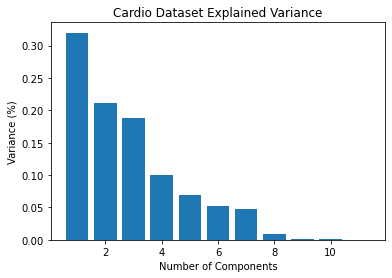

In [483]:
pca = PCA(n_components=11)
pca.fit(X1)
x=range(1,12,1)
plt.figure()
plt.bar(x,pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Cardio Dataset Explained Variance')
plt.show()

In [476]:
X = data.drop(['id','cardio'], axis=1)
Y1= data.cardio 
features = list(X.columns.values)
scaler = preprocessing.StandardScaler()

X1 = scaler.fit_transform(X)

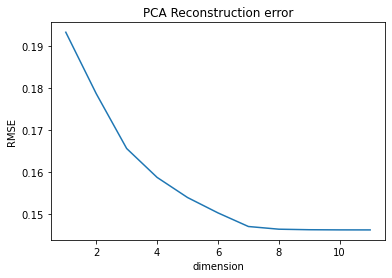

In [484]:
rc_errors_wine = {}
dims_wine = list(range(1,12,1))
for dim in dims_wine:
    grp = PCA(n_components=dim, random_state=10)
    x_prime = grp.fit_transform(X1)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = metrics.mean_squared_error(X1, reconstructed)    
    rc_errors_wine[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors_wine.keys()), list(rc_errors_wine.values()))
plt.xlabel("dimension")
plt.ylabel("RMSE")
plt.title("PCA Reconstruction error")
plt.show()

In [527]:
# Set dimensions
X = data.drop(['id','cardio'], axis=1)
Y1= data.cardio 
scaler = preprocessing.MinMaxScaler()

X1 = scaler.fit_transform(X)
ndimensions = 5
random_state=10

pca = PCA(n_components=ndimensions, random_state=44)
start = timer()
X_pca_array=pca.fit_transform(X1)
end = timer()
print("Time for fit: ", end - start)


X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2','PC3','PC4','PC5']) # PC=principal component
#X_pca.head()
sum(pca.explained_variance_ratio_)


Time for fit:  0.009424200019566342


0.8885531185513954

0.5083651573013275
0.4493544280778323
0.4215311874886343
0.33760683760683763
0.19912711402073105
0.10465539188943444
0.1900345517366794
0.16975813784324423


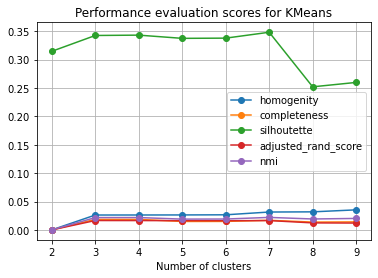

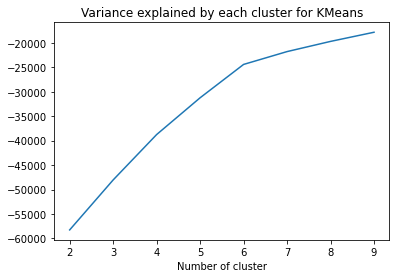

In [189]:
array_homo =[]
array_comp = []
array_sil = []
array_var = []
array_accuracy=[]
array_adj=[]
array_nmi=[]
cost =[]
y_test=Y1
component_list = range(2, 10,1)
for num_classes in component_list:

    clf = KMeans(n_clusters= num_classes, init='k-means++',n_init=50, max_iter=300, random_state=20)
    
    clf.fit(X_pca)
    y_test_pred = clf.predict(X_pca)
    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_test, y_test_pred)
    array_homo.append(homo)
    
    #Completeness score
    comp = metrics.completeness_score(y_test, y_test_pred)
    array_comp.append(comp)
    
    acc_score=metrics.accuracy_score(y_test, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)
    nmi_score=normalized_mutual_info_score(y_test, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_test, y_test_pred)
    array_adj.append(adj_score)
    
    #Silhoutette score
    sil = metrics.silhouette_score(X_pca, y_test_pred, metric='euclidean')
    array_sil.append(sil)

    #Variance explained by the cluster
    var = clf.score(X_pca)
    array_var.append(var)
    
    cost.append(clf.inertia_) 
    
    

#Generating plots
fig4,ax4 = plt.subplots()
ax4.plot(component_list, array_homo,"-o")
ax4.plot(component_list, array_comp,"-o")
ax4.plot(component_list, array_sil,"-o")
ax4.plot(component_list, array_adj,"-o")
ax4.plot(component_list, array_nmi,"-o")
#ax4.plot(component_list, array_accuracy,"-o")
plt.grid(True)
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for KMeans')


fig5, ax5 = plt.subplots()
ax5.plot(component_list, array_var)
plt.title('Variance explained by each cluster for KMeans')
plt.xlabel('Number of cluster')

plt.show()


0.5582833242407711
0.40798326968539733
0.3872522276777596
0.2834151663938898
0.06810329150754682
0.2369521731223859
0.2725040916530278
0.2746863066012002
0.2778687034006183


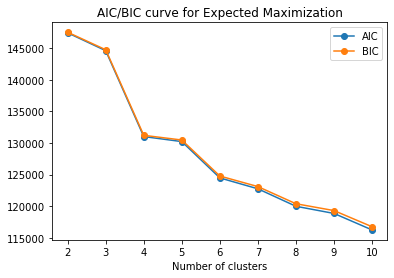

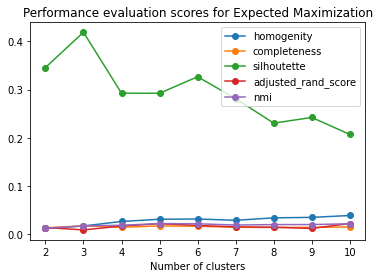

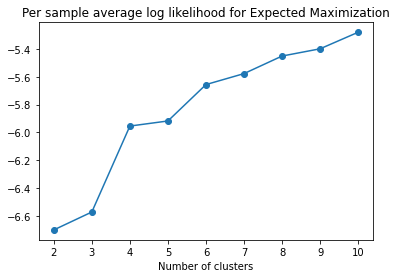

In [190]:
array_aic = []
array_bic = []
array_homo =[]
array_comp = []
array_sil = []
array_avg_log = []
array_accuracy=[]
array_adj=[]
array_nmi=[]
y_train=Y1
component_list = range(2, 11,1)
for num_classes in component_list:

    clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', max_iter=300, init_params= 'kmeans')
    #clf = KMeans(n_clusters= num_classes, init='k-means++')
    clf.fit(X_pca)

    y_test_pred = clf.predict(X_pca)
    #Per sample average log likelihood
    avg_log = clf.score(X_pca)
    array_avg_log.append(avg_log)

    #AIC on the test data
    aic = clf.aic(X_pca)
    array_aic.append(aic)

    #BIC on the test data
    bic = clf.bic(X_pca)
    array_bic.append(bic)
    
    acc_score=metrics.accuracy_score(y_train, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)

    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_train, y_test_pred)
    array_homo.append(homo)

    #Completeness score
    comp = metrics.completeness_score(y_train, y_test_pred)
    array_comp.append(comp)
    
    #print(acc_score)
    nmi_score=normalized_mutual_info_score(y_train, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_train, y_test_pred)
    array_adj.append(adj_score)

    #Silhoutette score
    sil = metrics.silhouette_score(X_pca, y_test_pred, metric='euclidean')
    array_sil.append(sil)

#Generating plots

fig1,ax1 = plt.subplots()
ax1.plot(component_list, array_aic,"-o")
ax1.plot(component_list, array_bic,"-o")
plt.legend(['AIC', 'BIC'])
plt.xlabel('Number of clusters')
plt.title('AIC/BIC curve for Expected Maximization')

fig2,ax2 = plt.subplots()
ax2.plot(component_list, array_homo,"-o")
ax2.plot(component_list, array_comp,"-o")
ax2.plot(component_list, array_sil,"-o")
ax2.plot(component_list, array_adj,"-o")
ax2.plot(component_list, array_nmi,"-o")
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for Expected Maximization')


fig3, ax3 = plt.subplots()
ax3.plot(component_list, array_avg_log,"-o")
plt.xlabel('Number of clusters')
plt.title('Per sample average log likelihood for Expected Maximization')


plt.show()

In [337]:
# Compare Kmeans and EM

# at this point, if you don't have labelled data,
# you can add the k-means cluster ids to this table and make a
# colored scatterplot.

kmeans = KMeans(n_clusters=6, random_state=random_state)
start = timer()
kmeans.fit(X_pca)
end = timer()
print("Time for fit: ", end - start)

y_cluster_kmeans = kmeans.predict(X_pca)

y_id_array = data['cardio'] # convert to nums

df_plotKM = X_pca.copy()
df_plotKM['ClusterKmeans'] = y_cluster_kmeans  #kmeans cluster
df_plotKM['target'] = y_id_array # also add actual labels so we can use it in later plots
#df_plotKM.sample(5)

Time for fit:  0.2043513999960851


In [338]:
gmm = GaussianMixture(n_components=6, random_state=random_state)
start = timer()
gmm.fit(X_pca)
end = timer()
print("Time for fit: ", end - start)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_pca)

df_plotEM = X_pca.copy()
df_plotEM['ClusterEM'] = y_cluster_gmm  #kmeans cluster
df_plotEM['target'] = y_id_array # also add actual labels so we can use it in later plots
#df_plotEM.sample(5)

Time for fit:  0.38489560000016354


In [428]:
def plotData(df, groupby, x, y, title):

    fig, ax = plt.subplots(figsize = (7,7))

    cmap = ["b","g","r","c","m","y"]
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.htPP
    for i, cluster in df.groupby(groupby):
        print(i)
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = x, y = y,
                     color = cmap[i], # cmap maps a number to a color
                     label = "%s %i" % (groupby, i),
                     alpha=0.3,
                     s=10) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title(title);
 

0
1
2
3
4
5
0
1
2
3
4
5
0
1


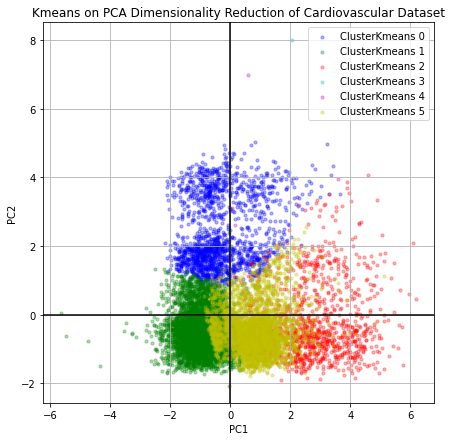

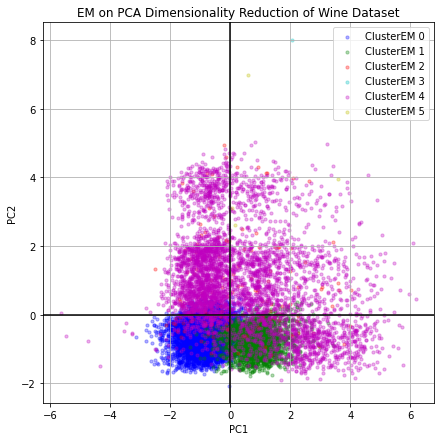

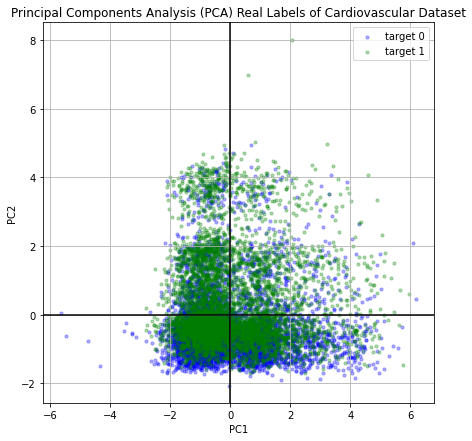

In [390]:
# PCA reduced Predicted Labels
nclusters=2
plotData(df_plotKM, 'ClusterKmeans', 'PC1', 'PC2', 
         'Kmeans on PCA Dimensionality Reduction of Cardiovascular Dataset')
plotData(df_plotEM, 'ClusterEM', 'PC1', 'PC2', 
         'EM on PCA Dimensionality Reduction of Wine Dataset')
plotData(df_plotKM, 'target', 'PC1', 'PC2', 
         'Principal Components Analysis (PCA) Real Labels of Cardiovascular Dataset')

D:\python\anaconda\envs\ML\lib\site-packages\sklearn\decomposition\_fastica.py:470: UserWarning: n_components is too large: it will be set to 11
  % n_components
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\decomposition\_fastica.py:470: UserWarning: n_components is too large: it will be set to 11
  % n_components


Text(0, 0.5, 'Kurtosis')

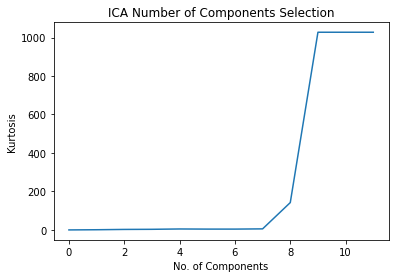

In [492]:
# Set dimensions
X = data.drop(['id','cardio'], axis=1)
Y1= data.cardio 
scaler = preprocessing.MinMaxScaler()

X1 = scaler.fit_transform(X)
kurt = []

for component in range(2,14):  
    ica = FastICA(n_components=component, random_state=44)
    ica.fit(X1)
    X_ica_array = ica.transform(X1)
    kurt.append(np.mean(np.apply_along_axis(kurtosis, 0, X_ica_array)))

plt.plot(kurt)
plt.title('ICA Number of Components Selection')
plt.xlabel('No. of Components')
plt.ylabel('Kurtosis')

In [488]:
import scipy
def _calculate(X, ica_, n_components):
    
    components = ica_.components_
    ica_.components_ = components[:n_components]

    transformed = ica_.transform(X)
    ica_.components_ = components
 
    kurtosis = scipy.stats.kurtosis(transformed)

    return kurtosis


Text(0, 0.5, 'kurtosis')

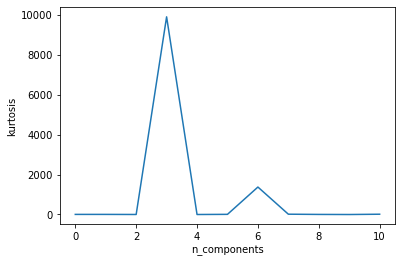

In [491]:
ica = FastICA(random_state=44)
ica.fit(X1)
fig, ax = plt.subplots()
#ax.line(np.arange(X_train.shape[1]), _calculate(X_train,ica, X_train.shape[1]) , linewidth=2, color = 'blue')
plt.plot(np.arange(X1.shape[1]), _calculate(X1,ica, X1.shape[1]) )
plt.axis('tight')
plt.xlabel('n_components')
ax.set_ylabel('kurtosis')

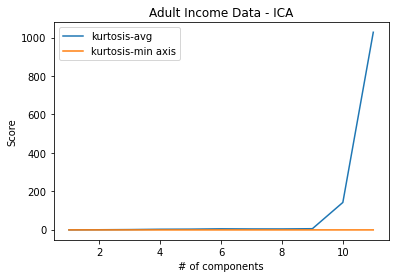

In [493]:

    maxc = X1.shape[1]
    l = 12
    ks = range(1,l)
    kur = np.zeros(maxc)
    scr = np.zeros(maxc)
    ss = np.zeros(l-1)
    ll = np.zeros(l-1)

    for i in ks:
        ica = FastICA(n_components = i,random_state=44)
        Z = ica.fit_transform(X1)
        kur[i-1] = np.mean(kurtosis(Z))
        scr[i-1] = np.amin(kurtosis(Z))



    plt.plot(ks,kur,ks,scr)
    plt.title("Adult Income Data - ICA")
    plt.xlabel("# of components")
    plt.ylabel("Score")
    plt.legend(["kurtosis-avg",'kurtosis-min axis'])
    plt.show()

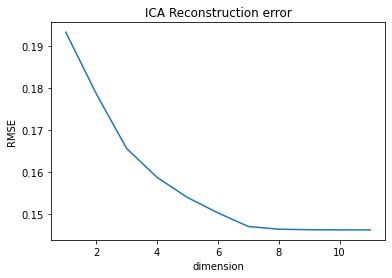

In [494]:

rc_errors_wine = {}
dims_wine = list(range(1,12,1))
for dim in dims_wine:
    grp = FastICA(n_components=dim, random_state=10)
    x_prime = grp.fit_transform(X1)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = metrics.mean_squared_error(X1, reconstructed)    
    rc_errors_wine[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors_wine.keys()), list(rc_errors_wine.values()))
plt.xlabel("dimension")
plt.ylabel("RMSE")
plt.title("ICA Reconstruction error")
plt.show()

In [501]:
X_train=X1
y_train=Y1
ica = FastICA(n_components=7, random_state=10)

start = timer()
ica.fit(X_train)
end = timer()
print("Time for fit: ", end - start)

X_ica_array = ica.transform(X_train)
X_ica = pd.DataFrame(X_ica_array, columns=['ICA1','ICA2','ICA3','ICA4','ICA5','ICA6','IC7'])
X_ica.sample(5)

Time for fit:  0.024197100021410733


,ICA1,ICA2,ICA3,ICA4,ICA5,ICA6,IC7
3427,0.031951,0.001248,-0.000193,-0.001923,0.005985,0.001967,0.004485
3150,0.021651,0.020775,-0.013422,0.028679,0.008762,-0.038349,0.004378
908,0.014182,0.001353,0.020446,0.000115,0.006247,0.001783,-0.019543
10084,-0.004651,0.003774,-0.013863,0.002545,-0.014422,0.003826,0.005237
8317,-0.004661,0.003745,-0.012723,0.002548,-0.014387,0.003881,0.005226


0.5133660665575559
0.40625568285142755
0.43489725404619023
0.43453355155482815
0.41471176577559554
0.3281505728314239
0.20130932896890344
0.1412984178941626
0.20458265139116202


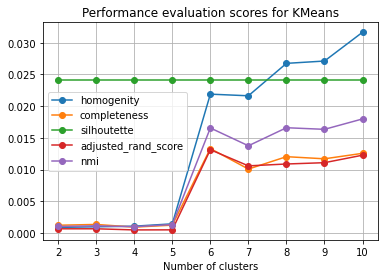

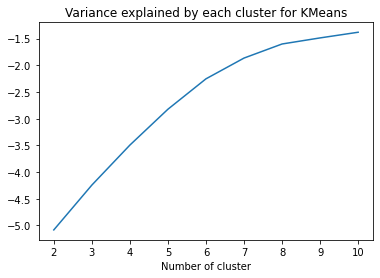

In [402]:
array_homo =[]
array_comp = []
array_sil = []
array_var = []
array_accuracy=[]
array_adj=[]
array_nmi=[]
cost =[]

component_list = range(2, 11,1)
for num_classes in component_list:

    clf = KMeans(n_clusters= num_classes, init='k-means++',n_init=50, max_iter=300, random_state=20)
    
    clf.fit(X_ica)
    y_test_pred = clf.predict(X_ica)
    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_train, y_test_pred)
    array_homo.append(homo)
    
    #Completeness score
    comp = metrics.completeness_score(y_train, y_test_pred)
    array_comp.append(comp)
    
    acc_score=metrics.accuracy_score(y_train, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)
    nmi_score=normalized_mutual_info_score(y_train, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_train, y_test_pred)
    array_adj.append(adj_score)
    
    #Silhoutette score
    sil = metrics.silhouette_score(X_ica, y_train, metric='euclidean')
    array_sil.append(sil)

    #Variance explained by the cluster
    var = clf.score(X_ica)
    array_var.append(var)
    
    cost.append(clf.inertia_) 
    
    

#Generating plots
fig4,ax4 = plt.subplots()
ax4.plot(component_list, array_homo,"-o")
ax4.plot(component_list, array_comp,"-o")
ax4.plot(component_list, array_sil,"-o")
ax4.plot(component_list, array_adj,"-o")
ax4.plot(component_list, array_nmi,"-o")
#ax4.plot(component_list, array_accuracy,"-o")
plt.grid(True)
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for KMeans')


fig5, ax5 = plt.subplots()
ax5.plot(component_list, array_var)
plt.title('Variance explained by each cluster for KMeans')
plt.xlabel('Number of cluster')

plt.show()



In [422]:
kmeans = KMeans(n_clusters=6, random_state=44)
start = timer()
kmeans.fit(X_ica)
end = timer()
print("Time for fit: ", end - start)
y_cluster_kmeans = kmeans.predict(X_ica)

y_id_array = data['cardio'] # convert to nums

df_plotKM = X_ica.copy()
df_plotKM['ClusterKmeans'] = y_cluster_kmeans  #kmeans cluster
df_plotKM['target'] = y_id_array

Time for fit:  0.14324049999413546


In [423]:
gmm = GaussianMixture(n_components=6, random_state=44)
start = timer()
gmm.fit(X_ica)
end = timer()
print("Time for fit: ", end - start)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_ica)

df_plotEM = X_ica.copy()
df_plotEM['ClusterEM'] = y_cluster_gmm  #kmeans cluster
df_plotEM['target'] = y_id_array # also add actual labels so we can use it in later plots
#df_plotEM.sample(5)

Time for fit:  0.1875675999908708


0.5331878523367886
0.5025459174395345
0.11983997090380069
0.33615202764138935
0.20258228768867068
0.24677214038916168
0.1497545008183306
0.18657937806873978
0.12747772322240408


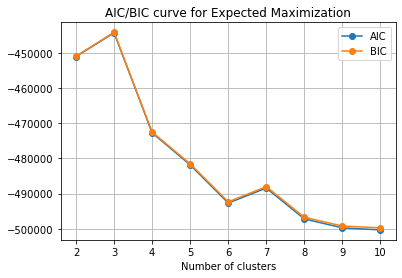

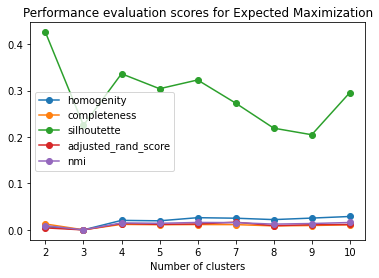

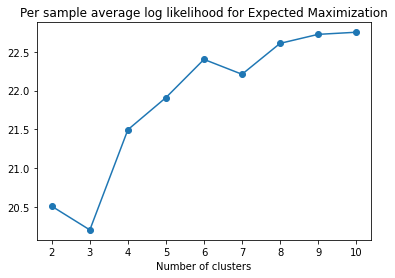

In [424]:
array_aic = []
array_bic = []
array_homo =[]
array_comp = []
array_sil = []
array_avg_log = []
array_accuracy=[]
array_adj=[]
array_nmi=[]

component_list = range(2, 11,1)
for num_classes in component_list:

    clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', max_iter=300, init_params= 'kmeans')
    #clf = KMeans(n_clusters= num_classes, init='k-means++')
    clf.fit(X_ica)

    y_test_pred = clf.predict(X_ica)
    #Per sample average log likelihood
    avg_log = clf.score(X_ica)
    array_avg_log.append(avg_log)

    #AIC on the test data
    aic = clf.aic(X_ica)
    array_aic.append(aic)

    #BIC on the test data
    bic = clf.bic(X_ica)
    array_bic.append(bic)
    
    acc_score=metrics.accuracy_score(y_train, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)

    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_train, y_test_pred)
    array_homo.append(homo)

    #Completeness score
    comp = metrics.completeness_score(y_train, y_test_pred)
    array_comp.append(comp)
    
    #print(acc_score)
    nmi_score=normalized_mutual_info_score(y_train, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_train, y_test_pred)
    array_adj.append(adj_score)

    #Silhoutette score
    sil = metrics.silhouette_score(X_ica, y_test_pred, metric='euclidean')
    array_sil.append(sil)

#Generating plots

fig1,ax1 = plt.subplots()
ax1.plot(component_list, array_aic,"-o")
ax1.plot(component_list, array_bic,"-o")
plt.legend(['AIC', 'BIC'])
plt.xlabel('Number of clusters')
plt.title('AIC/BIC curve for Expected Maximization')
plt.grid(True)
fig2,ax2 = plt.subplots()
ax2.plot(component_list, array_homo,"-o")
ax2.plot(component_list, array_comp,"-o")
ax2.plot(component_list, array_sil,"-o")
ax2.plot(component_list, array_adj,"-o")
ax2.plot(component_list, array_nmi,"-o")
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for Expected Maximization')


fig3, ax3 = plt.subplots()
ax3.plot(component_list, array_avg_log,"-o")
plt.xlabel('Number of clusters')
plt.title('Per sample average log likelihood for Expected Maximization')


plt.show()

In [416]:
score1 = metrics.adjusted_rand_score(y_train, y_cluster_kmeans)
score2 = metrics.adjusted_rand_score(y_train, y_cluster_gmm)
score3 = metrics.homogeneity_score(y_train, y_cluster_kmeans)
score4 = metrics.homogeneity_score(y_train, y_cluster_gmm)
score5 = normalized_mutual_info_score(y_train, y_cluster_kmeans)
score6 = normalized_mutual_info_score(y_train, y_cluster_gmm)
print('Goodness of clustering with KM after ICA: ', score1)
print('Goodness of clustering with EM after ICA: ', score2)
print('Homogeneity of clustering with KM after ICA: ', score3)
print('Homogeneity of clustering with EM after ICA: ', score4)
print('NMI of clustering with KM after ICA: ', score5)
print('NMI of clustering with EM after ICA: ', score6)

Goodness of clustering with KM after ICA:  0.0006550004398562568
Goodness of clustering with EM after ICA:  0.0003348606800545732
Homogeneity of clustering with KM after ICA:  0.0008799061003581038
Homogeneity of clustering with EM after ICA:  0.005539454644096145
NMI of clustering with KM after ICA:  0.0010219565756710985
NMI of clustering with EM after ICA:  0.009949861661378028


0
1
2
3
4
5
0
1
2
3
4
5
0
1


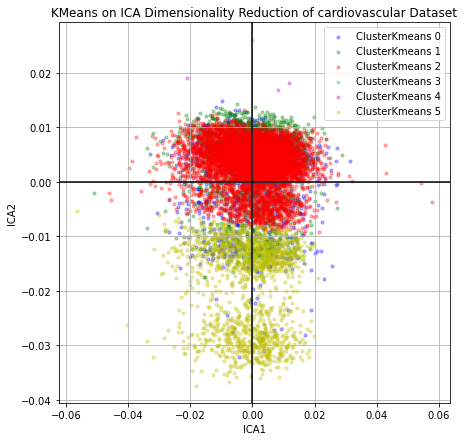

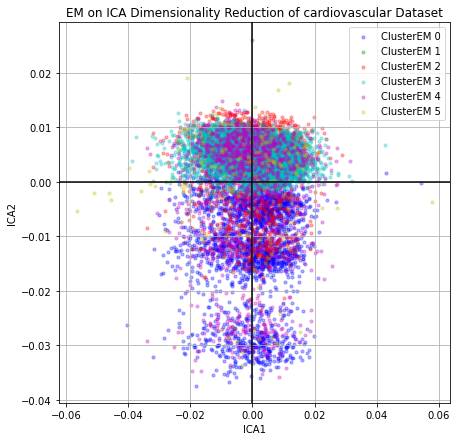

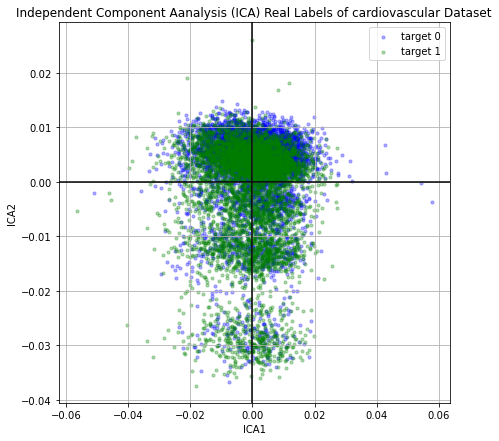

In [429]:
plotData(df_plotKM, 'ClusterKmeans', 'ICA1', 'ICA2',
         'KMeans on ICA Dimensionality Reduction of cardiovascular Dataset')
plotData(df_plotEM, 'ClusterEM', 'ICA1', 'ICA2',
         'EM on ICA Dimensionality Reduction of cardiovascular Dataset')
plotData(df_plotKM, 'target', 'ICA1', 'ICA2',
         'Independent Component Aanalysis (ICA) Real Labels of cardiovascular Dataset')

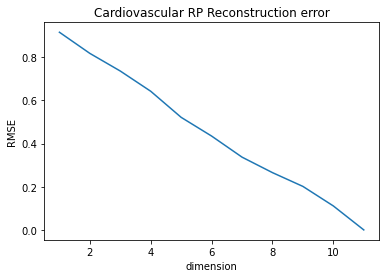

In [431]:
from sklearn.random_projection import GaussianRandomProjection
rc_errors_wine = {}
dims_wine = list(range(1,12,1))
for dim in dims_wine:
    grp = GaussianRandomProjection(n_components=dim, random_state=44)
    x_prime = grp.fit_transform(X_train)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = metrics.mean_squared_error(X_train, reconstructed)    
    rc_errors_wine[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors_wine.keys()), list(rc_errors_wine.values()))
plt.xlabel("dimension")
plt.ylabel("RMSE")
plt.title("Cardiovascular RP Reconstruction error")
plt.show()

In [519]:
#n_components=8
X_train=X1
Y_train=Y1
rp = GaussianRandomProjection(n_components=11, random_state=10)

start = timer()
rp.fit(X_train)
end = timer()
print("Time for fit: ", end - start)

X_rp_array = rp.transform(X_train)
X_rp = pd.DataFrame(X_rp_array, columns=['RP1','RP2','RP3','RP4','RP5','RP6','RP7','RP8','RP9','RP10','RP11' ])
X_rp.sample(5)

Time for fit:  0.0009443000017199665


,RP1,RP2,RP3,RP4,RP5,RP6,RP7,RP8,RP9,RP10,RP11
6506,-0.837953,-0.247201,-0.779932,-0.149672,0.262447,-0.442963,-0.620501,-0.235263,0.477681,0.320214,0.666421
2066,-0.418673,0.444782,-0.131534,-0.236634,-0.045611,-0.290117,-0.211826,0.422622,0.739548,-0.954168,0.880257
8823,0.214726,1.398150,2.006288,1.281262,0.151826,2.399610,-0.054234,-0.213226,0.430343,-1.136276,0.632344
500,-0.059780,0.200282,-0.587231,-0.334955,-0.017616,-0.478039,-0.104919,0.359172,0.464960,-0.435489,0.440741
3577,0.382922,-0.313301,-1.134219,-0.385453,0.167649,-0.831154,-0.065650,0.470319,0.017724,0.521100,-0.433273


In [222]:
kmeans = KMeans(n_clusters=6, random_state=10)
start = timer()
kmeans.fit(X_rp)
end = timer()
print("Time for fit: ", end - start)
y_cluster_kmeans = kmeans.predict(X_rp)

y_id_array = data['cardio'] # convert to nums

df_plotKM = X_rp.copy()
df_plotKM['ClusterKmeans'] = y_cluster_kmeans  #kmeans cluster
df_plotKM['target'] = y_id_array

Time for fit:  0.39098009999725036


In [223]:
gmm = GaussianMixture(n_components=6, random_state=10)
start = timer()
gmm.fit(X_rp)
end = timer()
print("Time for fit: ", end - start)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_rp)

df_plotEM = X_rp.copy()
df_plotEM['ClusterEM'] = y_cluster_gmm  #kmeans cluster
df_plotEM['target'] = y_id_array # also add actual labels so we can use it in later plots
#df_plotEM.sample(5)

Time for fit:  0.39806249999674037


0.5073649754500819
0.18930714675395527
0.25377341334788145
0.3788870703764321
0.2531369339879978
0.27150390980178213
0.2650481905801055
0.07592289507183124
0.1730314602655028
0.07392253136933988
0.1652118567012184
0.10847426804873614
0.1082924168030551
0.10456446626659392
0.10183669758137844
0.10192762320421894
0.0723767957810511
0.061192944171667575
0.0375522822331333


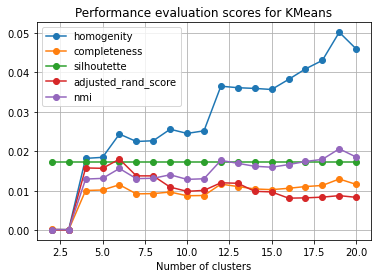

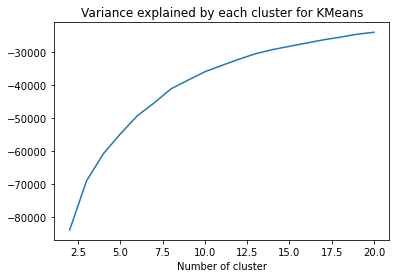

In [224]:
array_homo =[]
array_comp = []
array_sil = []
array_var = []
array_accuracy=[]
array_adj=[]
array_nmi=[]
cost =[]

component_list = range(2, 11,1)
for num_classes in component_list:

    clf = KMeans(n_clusters= num_classes, init='k-means++',n_init=50, max_iter=300, random_state=20)
    
    clf.fit(X_rp)
    y_test_pred = clf.predict(X_rp)
    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_train, y_test_pred)
    array_homo.append(homo)
    
    #Completeness score
    comp = metrics.completeness_score(y_train, y_test_pred)
    array_comp.append(comp)
    
    acc_score=metrics.accuracy_score(y_train, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)
    nmi_score=normalized_mutual_info_score(y_train, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_train, y_test_pred)
    array_adj.append(adj_score)
    
    #Silhoutette score
    sil = metrics.silhouette_score(X_rp, y_train, metric='euclidean')
    array_sil.append(sil)

    #Variance explained by the cluster
    var = clf.score(X_rp)
    array_var.append(var)
    
    cost.append(clf.inertia_) 
    
    

#Generating plots
fig4,ax4 = plt.subplots()
ax4.plot(component_list, array_homo,"-o")
ax4.plot(component_list, array_comp,"-o")
ax4.plot(component_list, array_sil,"-o")
ax4.plot(component_list, array_adj,"-o")
ax4.plot(component_list, array_nmi,"-o")
#ax4.plot(component_list, array_accuracy,"-o")
plt.grid(True)
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for KMeans')


fig5, ax5 = plt.subplots()
ax5.plot(component_list, array_var)
plt.title('Variance explained by each cluster for KMeans')
plt.xlabel('Number of cluster')

plt.show()



0.5241862156755773
0.41025641025641024
0.3061465721040189
0.2528641571194763
0.20212765957446807
0.20667394071649392
0.13120567375886524
0.11756683033278778
0.16175668303327878
0.1446626659392617
0.10911074740861974
0.11429350791052918
0.1192944171667576
0.07974177123113294
0.10847426804873614
0.08528823422440444
0.06810329150754682
0.07110383706128387
0.042371340243680666


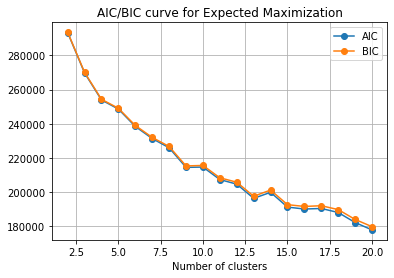

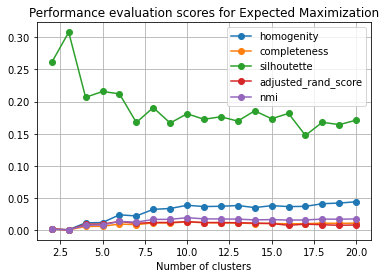

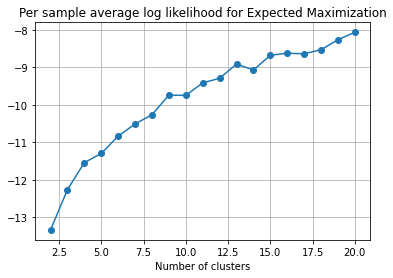

In [225]:
array_aic = []
array_bic = []
array_homo =[]
array_comp = []
array_sil = []
array_avg_log = []
array_accuracy=[]
array_adj=[]
array_nmi=[]

component_list = range(2, 11,1)
for num_classes in component_list:

    clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', max_iter=300, init_params= 'kmeans')
    #clf = KMeans(n_clusters= num_classes, init='k-means++')
    clf.fit(X_rp)

    y_test_pred = clf.predict(X_rp)
    #Per sample average log likelihood
    avg_log = clf.score(X_rp)
    array_avg_log.append(avg_log)

    #AIC on the test data
    aic = clf.aic(X_rp)
    array_aic.append(aic)

    #BIC on the test data
    bic = clf.bic(X_rp)
    array_bic.append(bic)
    
    acc_score=metrics.accuracy_score(y_train, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)

    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_train, y_test_pred)
    array_homo.append(homo)

    #Completeness score
    comp = metrics.completeness_score(y_train, y_test_pred)
    array_comp.append(comp)
    
    #print(acc_score)
    nmi_score=normalized_mutual_info_score(y_train, y_test_pred)
    array_nmi.append(nmi_score)
    
    #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_train, y_test_pred)
    array_adj.append(adj_score)

    #Silhoutette score
    sil = metrics.silhouette_score(X_rp, y_test_pred, metric='euclidean')
    array_sil.append(sil)

#Generating plots

fig1,ax1 = plt.subplots()
ax1.plot(component_list, array_aic,"-o")
ax1.plot(component_list, array_bic,"-o")
plt.legend(['AIC', 'BIC'])
plt.xlabel('Number of clusters')
plt.title('AIC/BIC curve for Expected Maximization')
plt.grid(True)
fig2,ax2 = plt.subplots()
ax2.plot(component_list, array_homo,"-o")
ax2.plot(component_list, array_comp,"-o")
ax2.plot(component_list, array_sil,"-o")
ax2.plot(component_list, array_adj,"-o")
ax2.plot(component_list, array_nmi,"-o")
plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for Expected Maximization')
plt.grid(True)

fig3, ax3 = plt.subplots()
ax3.plot(component_list, array_avg_log,"-o")
plt.xlabel('Number of clusters')
plt.title('Per sample average log likelihood for Expected Maximization')
plt.grid(True)

plt.show()

In [226]:
#score1 = adjusted_rand_score(y, y_cluster_kmeans)
#score2 = adjusted_rand_score(y, y_cluster_gmm)
score3 = metrics.homogeneity_score(y_train, y_cluster_kmeans)
score4 = metrics.homogeneity_score(y_train, y_cluster_gmm)
score5 = normalized_mutual_info_score(y_train, y_cluster_kmeans)
score6 = normalized_mutual_info_score(y_train, y_cluster_gmm)
#print('Goodness of clustering with KM after RP: ', score1)
#print('Goodness of clustering with EM after RP: ', score2)
print('Homogeneity of clustering with KM after RP: ', score3)
print('Homogeneity of clustering with EM after RP: ', score4)
print('NMI of clustering with KM after RP: ', score5)
print('NMI of clustering with EM after RP: ', score6)

Homogeneity of clustering with KM after RP:  0.024326313998967883
Homogeneity of clustering with EM after RP:  0.016883681009958434
NMI of clustering with KM after RP:  0.01561669004956129
NMI of clustering with EM after RP:  0.010213628723194932


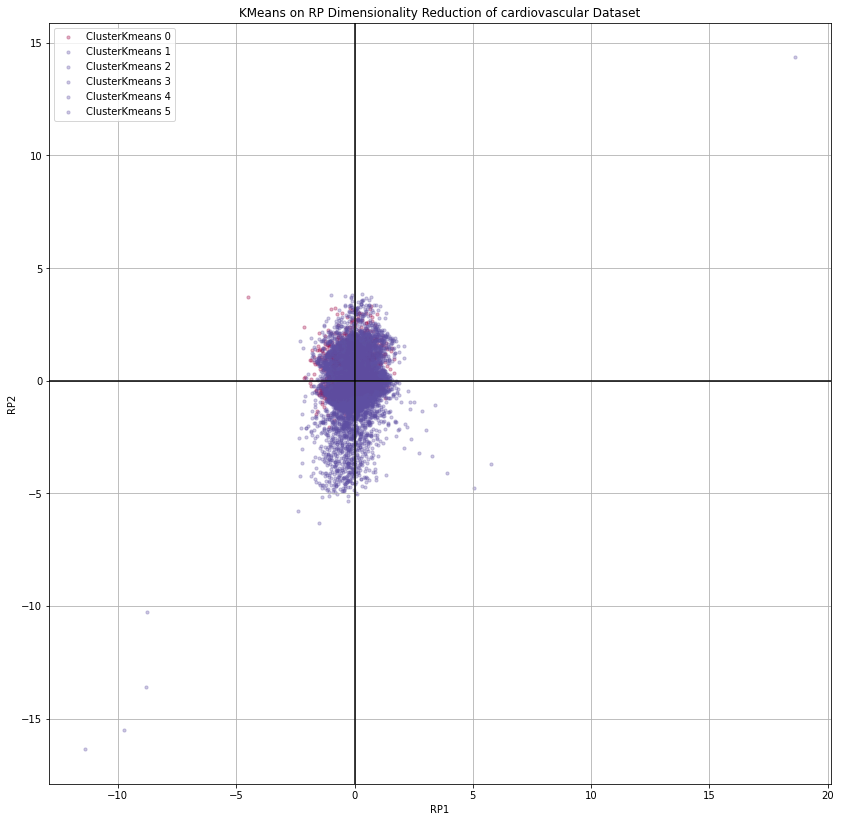

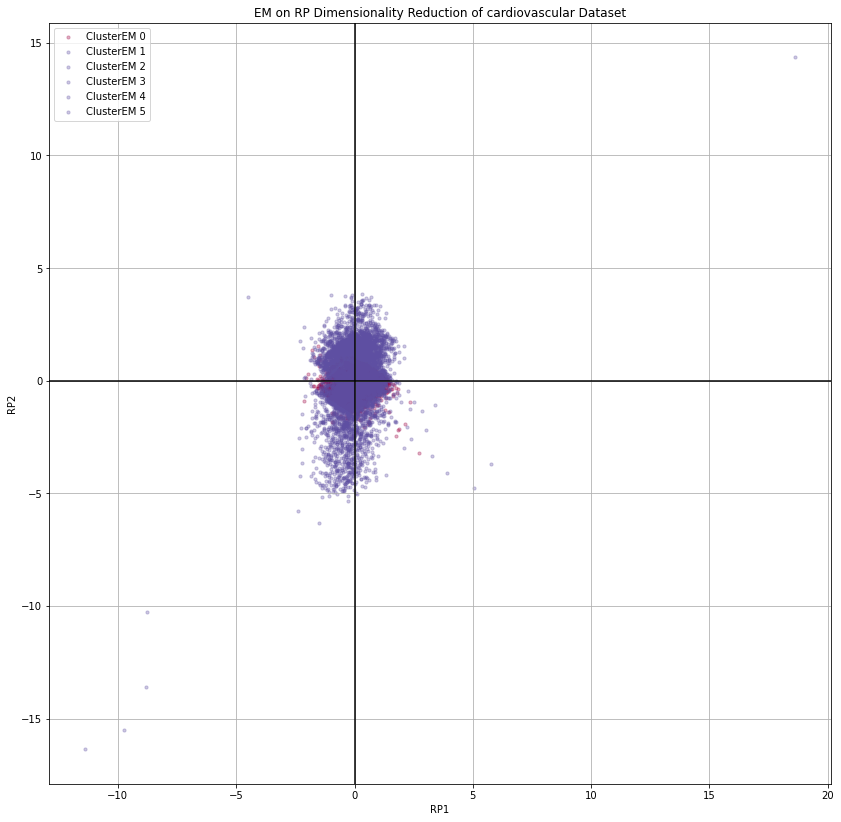

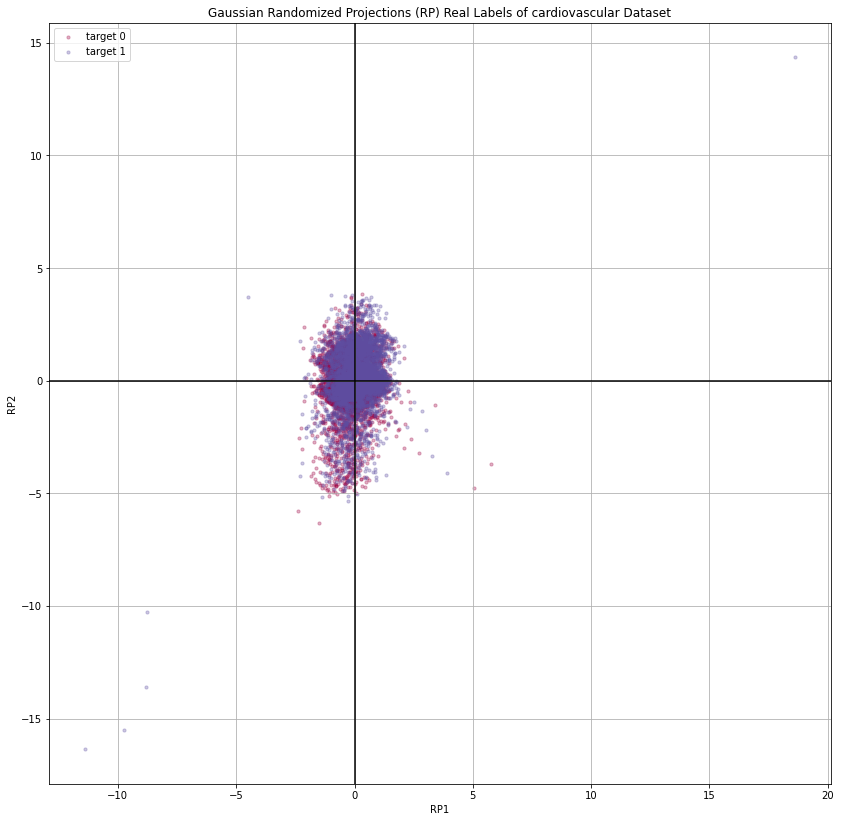

In [227]:
plotData(df_plotKM, 'ClusterKmeans', 'RP1', 'RP2', 
         'KMeans on RP Dimensionality Reduction of cardiovascular Dataset')
plotData(df_plotEM, 'ClusterEM', 'RP1', 'RP2', 
         'EM on RP Dimensionality Reduction of cardiovascular Dataset')
plotData(df_plotKM, 'target', 'RP1', 'RP2', 
         'Gaussian Randomized Projections (RP) Real Labels of cardiovascular Dataset')

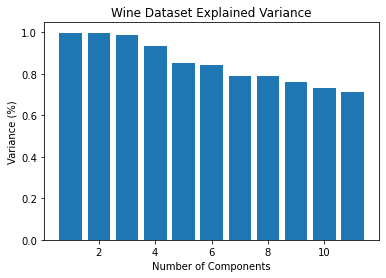

Text(0.5, 1.0, 'Caridovascular Factor Analysis eigen values')

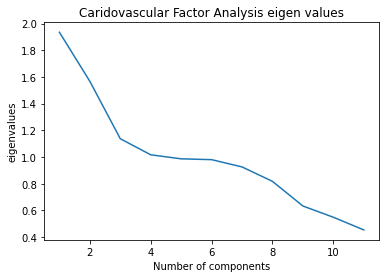

In [521]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.2)
#Reducing the dimensions with optimal number of components
fa_new = FactorAnalysis(n_components = 13, max_iter = 100)
fa_new.fit(X_train)
X_train_transformed = fa_new.transform(X_train)
X_test_transformed = fa_new.transform(X_test)
x=range(1,12,1)
plt.figure()
plt.bar(x,sorted(fa_new.noise_variance_,reverse = True))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Wine Dataset Explained Variance')
plt.show()
fa_new.components_

!pip install factor_analyzer  

from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(X_train, 10)
#Get Eigen values 
ev, v = fa.get_eigenvalues()
ev
plt.plot(x,ev)
plt.xlabel('Number of components')
plt.ylabel('eigenvalues')
plt.title('Caridovascular Factor Analysis eigen values')

In [523]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size = 0.2)
#Reducing the dimensions with optimal number of components
fa_new = FactorAnalysis(n_components = 6, max_iter = 100)
start = timer()
fa_new.fit(X_train)
end = timer()
print("Time for fit: ", end - start)


X_train_transformed = fa_new.transform(X_train)
X_test_transformed = fa_new.transform(X_test)

Time for fit:  0.2973218999977689


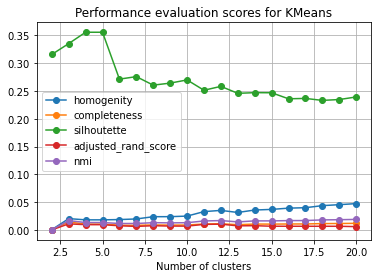

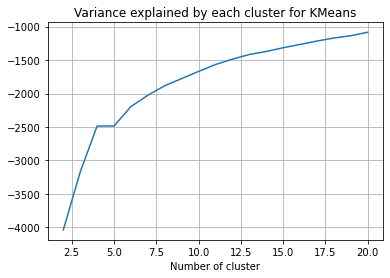

In [525]:
array_homo =[]
array_comp = []
array_sil = []
array_var = []
array_accuracy=[]
cost =[]
array_adj =[]
array_nmi=[]

component_list = range(2, 21,1)
for num_classes in component_list:

    
    
    clf = KMeans(n_clusters= num_classes, init='k-means++',n_init=50, max_iter=300, random_state=20)
    
    clf.fit(X_train_transformed)
    y_test_pred = clf.predict(X_test_transformed)
    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_test, y_test_pred)
    array_homo.append(homo)
    
    #Completeness score
    comp = metrics.completeness_score(y_test, y_test_pred)
    array_comp.append(comp)
    
 #print(normalized_mutual_info_score(y_test, y_test_pred))
    adj_score = metrics.adjusted_rand_score(y_test, y_test_pred)
    array_adj.append(adj_score)
    
    nmi_score=normalized_mutual_info_score(y_test, y_test_pred)
    array_nmi.append(nmi_score)
      
    #Silhoutette score
    sil = metrics.silhouette_score(X_test_transformed, y_test_pred, metric='euclidean')
    array_sil.append(sil)

    #Variance explained by the cluster
    var = clf.score(X_test_transformed)
    array_var.append(var)
    
    cost.append(clf.inertia_) 
    
    

#Generating plots
fig4,ax4 = plt.subplots()
plt.grid(True)
ax4.plot(component_list, array_homo,"-o")
ax4.plot(component_list, array_comp,"-o")
ax4.plot(component_list, array_sil,"-o")
ax4.plot(component_list, array_adj,"-o")
ax4.plot(component_list, array_nmi,"-o")
#ax4.plot(component_list, array_accuracy,"-o")

plt.legend(['homogenity','completeness','silhoutette','adjusted_rand_score','nmi'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for KMeans')


fig5, ax5 = plt.subplots()
ax5.plot(component_list, array_var)
plt.title('Variance explained by each cluster for KMeans')
plt.xlabel('Number of cluster')
plt.grid(True)
plt.show()



0.5418181818181819
0.3440909090909091
0.22818181818181818
0.24727272727272728
0.1618181818181818
0.27454545454545454
0.17545454545454545
0.2109090909090909
0.1572727272727273
0.13136363636363638
0.07636363636363637
0.12545454545454546
0.1009090909090909
0.05045454545454545
0.0809090909090909
0.06727272727272728
0.11136363636363636
0.060909090909090906
0.08181818181818182


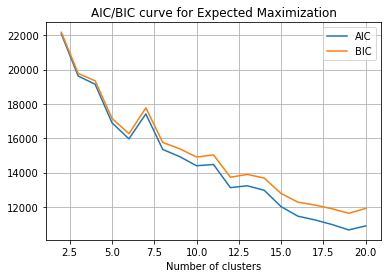

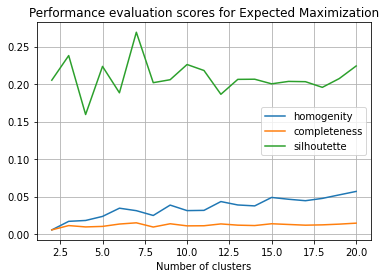

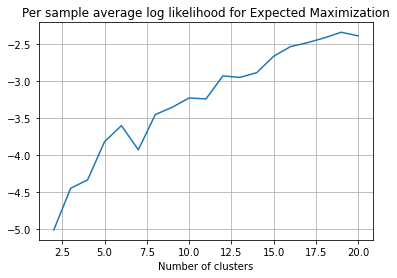

In [231]:
array_aic = []
array_bic = []
array_homo =[]
array_comp = []
array_sil = []
array_avg_log = []
array_accuracy=[]

component_list = range(2, 11,1)
for num_classes in component_list:

    clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', max_iter=300, init_params= 'kmeans')
    #clf = KMeans(n_clusters= num_classes, init='k-means++')
    clf.fit(X_train_transformed)

    y_test_pred = clf.predict(X_test_transformed)
    #Per sample average log likelihood
    avg_log = clf.score(X_test_transformed)
    array_avg_log.append(avg_log)

    #AIC on the test data
    aic = clf.aic(X_test_transformed)
    array_aic.append(aic)

    #BIC on the test data
    bic = clf.bic(X_test_transformed)
    array_bic.append(bic)
    
    acc_score=metrics.accuracy_score(y_test, y_test_pred)
    array_accuracy.append(acc_score)
    print(acc_score)

    #Homogenity score on the test data
    homo = metrics.homogeneity_score(y_test, y_test_pred)
    array_homo.append(homo)

    #Completeness score
    comp = metrics.completeness_score(y_test, y_test_pred)
    array_comp.append(comp)

    #Silhoutette score
    sil = metrics.silhouette_score(X_test_transformed, y_test_pred, metric='euclidean')
    array_sil.append(sil)

#Generating plots

fig1,ax1 = plt.subplots()
ax1.plot(component_list, array_aic)
ax1.plot(component_list, array_bic)
plt.legend(['AIC', 'BIC'])
plt.xlabel('Number of clusters')
plt.title('AIC/BIC curve for Expected Maximization')
plt.grid(True)
fig2,ax2 = plt.subplots()
ax2.plot(component_list, array_homo)
ax2.plot(component_list, array_comp)
ax2.plot(component_list, array_sil)
plt.legend(['homogenity','completeness','silhoutette'])
plt.xlabel('Number of clusters')
plt.title('Performance evaluation scores for Expected Maximization')
plt.grid(True)

fig3, ax3 = plt.subplots()
ax3.plot(component_list, array_avg_log)
plt.xlabel('Number of clusters')
plt.title('Per sample average log likelihood for Expected Maximization')
plt.grid(True)

plt.show()

In [436]:
# Adapted from https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greys):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.tight_layout()
    
    return plt

In [437]:
# Plot learning curves
# Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.close()
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")

Accuracy Test Score:  0.7018181818181818
Accuracy Train Score: 0.7333484882927939
Cross Value: 0.72 (+/- 0.02)
----
----
RMSE: 0.29818181818181816
----
Confusion Matrix : 
[[864 232]
 [424 680]]


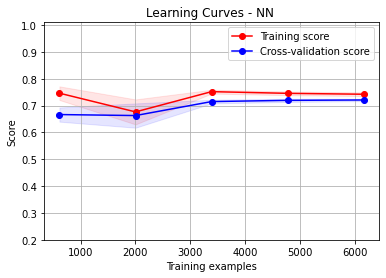

In [453]:
X = data.drop(['id','cardio'], axis=1)
scaler = preprocessing.StandardScaler()
# transform data
X1 = scaler.fit_transform(X)
plt.show()

Y1=data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=44)

# Best Params from Assignment 1
clf_nn_tuned = MLPClassifier(activation='relu', max_iter=100, learning_rate_init=.1,hidden_layer_sizes=(16,8))
clf_nn_tuned.fit(X_train, y_train)
y_pred = clf_nn_tuned.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = clf_nn_tuned.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(clf_nn_tuned, X_train, y_train, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))

title = "Learning Curves - NN "
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)
plot_learning_curve(clf_nn_tuned, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=-1)
plt.grid()

In [439]:
start = timer()
#ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

Time for fit:  2.5300003471784294e-05


In [440]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred))
#print("f1 score :",metrics.f1_score(y_test, y_pred_nn_tuned))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred,average='weighted'))

Accuracy score: 0.71
f1 score Micro: 0.7100000000000001
f1 score Macro: 0.7099530171829487
f1 score Weighted: 0.7099932881689927


Time for fit:  0.862716100004036
Accuracy Test Score:  0.7045454545454546
Accuracy Train Score: 0.7249374857922255
Cross Value: 0.72 (+/- 0.02)
----
----
RMSE: 0.29545454545454547
----
Confusion Matrix : 
[[799 297]
 [353 751]]


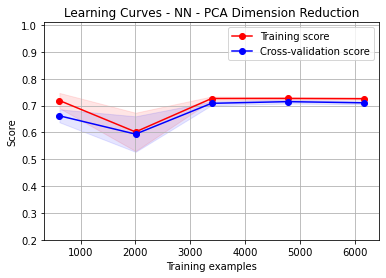

In [486]:
# Build Training and Testing Set PCA
y_train=Y1
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y1, test_size=0.2, random_state=44)

# Best Params from Assignment 1
ann = MLPClassifier(activation='relu', max_iter=100, learning_rate_init=.1,hidden_layer_sizes=(16,8))

start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_train, y_train, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))

title = "Learning Curves - NN - PCA Dimension Reduction"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=-1)
plt.grid()

Time for fit:  0.4786287999886554
Accuracy Test Score:  0.6090909090909091
Accuracy Train Score: 0.614798817913162
Cross Value: 0.59 (+/- 0.10)
----
----
RMSE: 0.39090909090909093
----
Confusion Matrix : 
[[502 594]
 [266 838]]


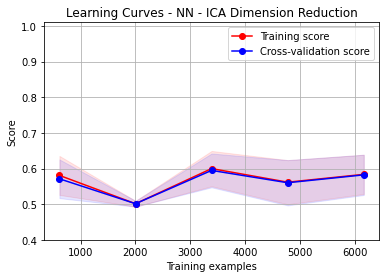

In [504]:
y_train=Y1
# Build Training and Testing Set PCA
X_train, X_test, y_train, y_test = train_test_split(X_ica, y_train, test_size=0.2, random_state=44)

# Best Params from Assignment 1
ann = MLPClassifier(activation='relu', max_iter=100, learning_rate_init=.1,hidden_layer_sizes=(16,8))

start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_test, y_test, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))

title = "Learning Curves - NN - ICA Dimension Reduction"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=-1)
plt.grid()

Time for fit:  1.758187800005544
Accuracy Test Score:  0.6759090909090909
Accuracy Train Score: 0.686178676972039
Cross Value: 0.62 (+/- 0.03)
----
----
RMSE: 0.3240909090909091
----
Confusion Matrix : 
[[752 377]
 [336 735]]


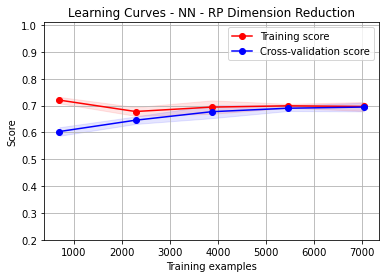

In [505]:
y_train=Y1
# Build Training and Testing Set PCA
X_train, X_test, y_train, y_test = train_test_split(X_rp, y_train, test_size=0.2, random_state=random_state)

# Best Params from Assignment 1
ann = MLPClassifier(activation='relu', max_iter=100, learning_rate_init=.1,hidden_layer_sizes=(16,8))

start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_test, y_test, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))

title = "Learning Curves - NN - RP Dimension Reduction"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=-1)
plt.grid()

In [516]:
fa_new = FactorAnalysis(n_components = 7, max_iter = 100)

start = timer()
X_fa=fa_new.fit_transform(X1)
end = timer()
print("Time for fit: ", end - start)


Time for fit:  0.4670683000003919


Time for fit:  0.3683172999881208
Accuracy Test Score:  0.6286363636363637
Accuracy Train Score: 0.6475335303478064
Cross Value: 0.61 (+/- 0.11)
----
----
RMSE: 0.37136363636363634
----
Confusion Matrix : 
[[637 492]
 [325 746]]


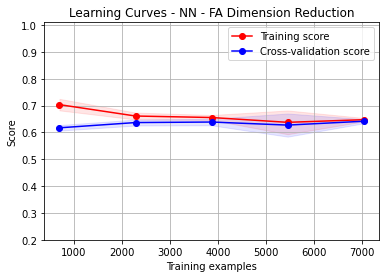

In [517]:
y_train=Y1
# Build Training and Testing Set PCA
X_train, X_test, y_train, y_test = train_test_split(X_fa, y_train, test_size=0.2, random_state=random_state)

# Best Params from Assignment 1
ann = MLPClassifier(activation='relu', max_iter=400, learning_rate_init=.1,hidden_layer_sizes=(8,4))

start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_test, y_test, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))

title = "Learning Curves - NN - FA Dimension Reduction"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=-1)
plt.grid()

In [510]:
#scaler = preprocessing.MinMaxScaler()
X = data.drop(['id','cardio'], axis=1)
scaler = preprocessing.MinMaxScaler()
# transform data
X1 = scaler.fit_transform(X)
kmeans = KMeans(n_clusters= 6, init='k-means++',n_init=50, max_iter=500, random_state=44)

start = timer()
X_kmeans=kmeans.fit_transform(X1)
end = timer()
print("Time for fit: ", end - start)

#X_kmeans = kmeans.transform(X1)
#X_kmeans = pd.DataFrame(X_kmeans_array, columns=['K1','K2','K3','K4','K5','K6','K7','K8'])
#X_kmeans = pd.DataFrame(X_kmeans_array, columns=['K1','K2','K3'])

Time for fit:  0.8770632000232581


Time for fit:  0.6268215000163764
Accuracy Test Score:  0.49818181818181817
Accuracy Train Score: 0.4992043646283246
Cross Value: 0.53 (+/- 0.07)
----
----
RMSE: 0.5018181818181818
----
Confusion Matrix : 
[[1096    0]
 [1104    0]]


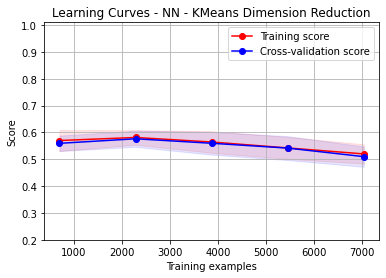

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X_kmeans, Y1, test_size=0.2, random_state=44)

# Best Params from Assignment 1
ann = MLPClassifier(activation='relu', max_iter=100, learning_rate_init=.1,hidden_layer_sizes=(16,8))

start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_test, y_test, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))

title = "Learning Curves - NN - KMeans Dimension Reduction"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=-1)
plt.grid()

In [512]:
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=44)

start = timer()
gmm.fit(X1)
end = timer()
print("Time for fit: ", end - start)

X_gmm = gmm.predict_proba(X1)
#X_gmm = pd.DataFrame(X_gmm_array, columns=['G1','G2','G3','G4','G5','G6','G7','G8'])

Time for fit:  0.1827501000079792


Time for fit:  0.2819946999952663
Accuracy Test Score:  0.5186363636363637
Accuracy Train Score: 0.5057967719936349
Cross Value: 0.54 (+/- 0.04)
----
----
RMSE: 0.4813636363636364
----
Confusion Matrix : 
[[1121    8]
 [1051   20]]


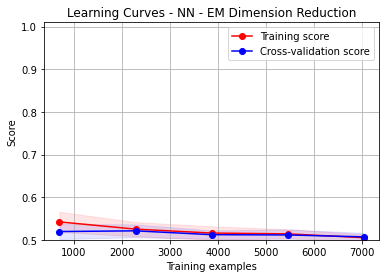

In [513]:
# Build Training and Testing Set PCA
X_train, X_test, y_train, y_test = train_test_split(X_gmm, Y1, test_size=0.2, random_state=random_state)

# Best Params from Assignment 1
ann = MLPClassifier(activation='relu', max_iter=100, learning_rate_init=.1,hidden_layer_sizes=(16,8))

start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X_test, y_test, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
#print('Precision Score : ' + str(precision_score(y_test,y_pred)))
#print('Recall Score : ' + str(recall_score(y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(metrics.confusion_matrix(y_test,y_pred)))

title = "Learning Curves - NN - EM Dimension Reduction"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.5, 1.01), cv=cv, n_jobs=-1)
plt.grid()